In [ ]:
import Aoc from "../aoc.ts";

const aoc = await Aoc.load(2024, 4);


In [1]:
let input = `MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX`;

// input = aoc.input;

const parsed = input.split('\n').map((l) => l.split(''));
const w = parsed[0].length;
const h = parsed.length;


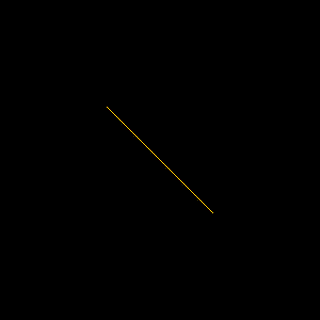

In [1]:
import { Viz } from '../viz.ts';

const viz = new Viz(300, 300);

let canvas: any;

for (let i=0; i<200; i++) {
  viz.frame((ctx) => {
    ctx.strokeStyle = `rgb(${255-i}, 200, ${i})`;
    ctx.strokeWidth = 10;
    ctx.beginPath();
    if (i<100) {
      ctx.moveTo(100, 100+i);
      ctx.lineTo(200, 200-i);
    } else {
      ctx.moveTo(i, 200);
      ctx.lineTo(300-i, 100);
    }
    ctx.stroke();
  }, canvas);
  if (i === 50) canvas = viz.snapshot();
}

await viz.render(200, 'day4p2.mp4');
